In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from keras.utils import plot_model
from sklearn.metrics import confusion_matrix

In [2]:
IMG_ROWS = 28
IMG_COLS = 28
NUM_CLASSES = 10
TEST_SIZE = 0.2
RANDOM_STATE = 2018


In [3]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
X_train = np.expand_dims(X_train, axis=-1)
X_val = np.expand_dims(X_val, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

In [4]:
train_data = pd.read_csv("fashion-mnist_train.csv")
test_data = pd.read_csv("fashion-mnist_test.csv")

In [5]:
print("Fashion MNIST train -  rows:",train_data.shape[0]," columns:", train_data.shape[1])
print("Fashion MNIST test -  rows:",test_data.shape[0]," columns:", test_data.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [6]:
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

def get_classes_distribution(data):
    label_counts = data["label"].value_counts()

    total_samples = len(data)


    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

get_classes_distribution(train_data)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


C:\Users\Danica\AppData\Local\Temp\ipykernel_14752\2175742230.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  g = sns.countplot(x='label', data=data, order=class_order, palette=palette)


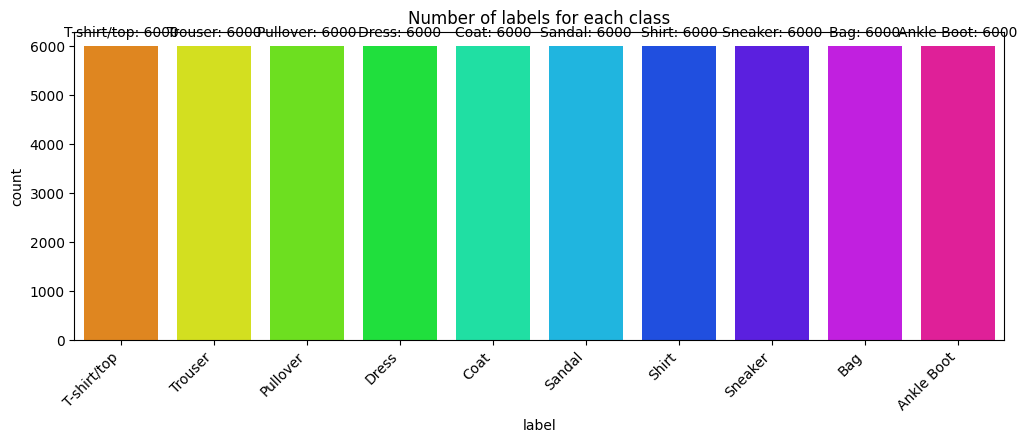

In [7]:
def plot_label_per_class_with_labels(data, labels):
    class_order = list(range(10))
    

    palette = sns.color_palette("hsv", len(class_order))
    

    f, ax = plt.subplots(1, 1, figsize=(12, 4))
    g = sns.countplot(x='label', data=data, order=class_order, palette=palette)
    g.set_title("Number of labels for each class")
    
    for p in g.patches:
        label_index = int(p.get_x() + p.get_width() / 2.)
        label_name = labels[label_index]
        count = f'{int(p.get_height())}'
        annotation_text = f'{label_name}: {count}'
        g.annotate(annotation_text, (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha='center', va='bottom', xytext=(0, 5), textcoords='offset points')
    
    plt.xticks(ticks=range(10), labels=[labels[i] for i in range(10)], rotation=45, ha="right")
    plt.show()

plot_label_per_class_with_labels(train_data, labels)

In [8]:
get_classes_distribution(test_data)


T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


In [10]:
def sample_images_data(data):
    # An empty list to collect some samples
    sample_images = []
    sample_labels = []

    for k in labels.keys():
        samples = data[data["label"] == k].head(4)
        for j, s in enumerate(samples.values):
            img = np.array(samples.iloc[j, 1:]).reshape(IMG_ROWS,IMG_COLS)
            sample_images.append(img)
            sample_labels.append(samples.iloc[j, 0])

    print("Total number of sample images to plot: ", len(sample_images))
    return sample_images, sample_labels

train_sample_images, train_sample_labels = sample_images_data(train_data)

Total number of sample images to plot:  40


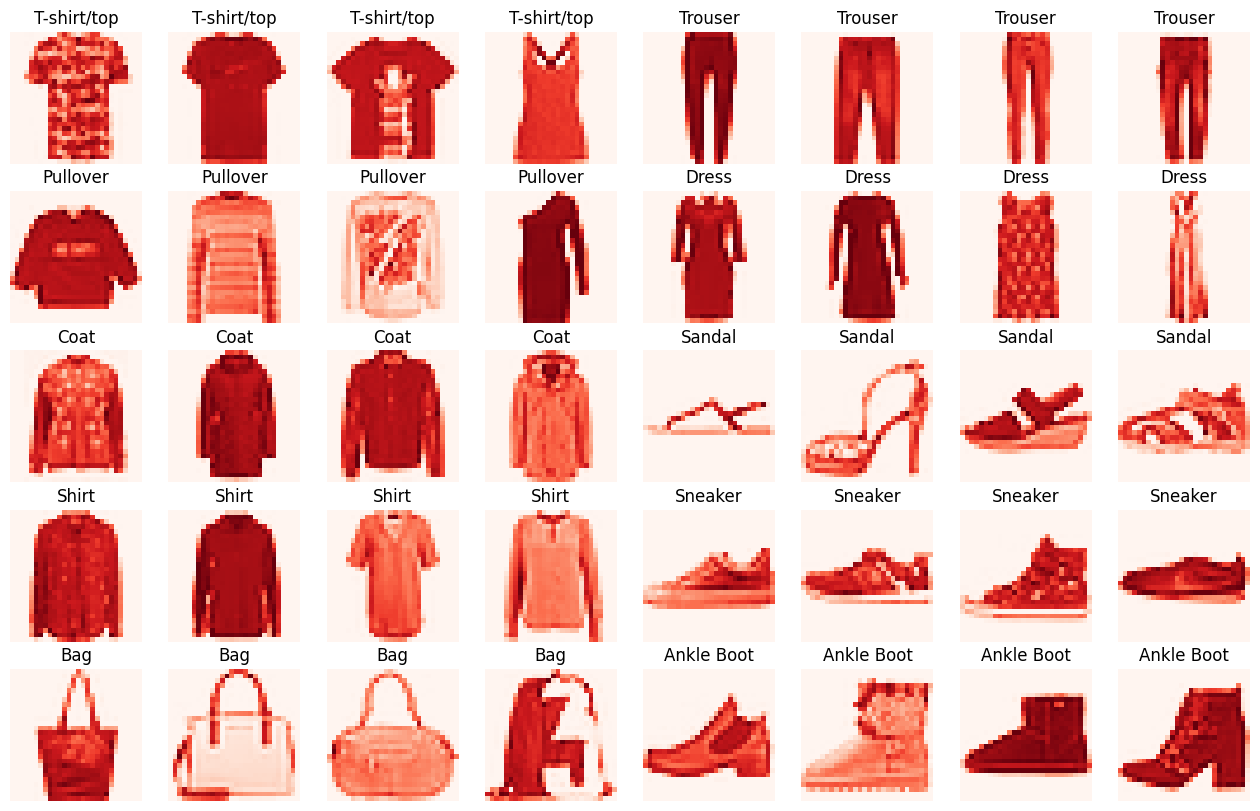

In [11]:
def plot_sample_images(data_sample_images,data_sample_labels,cmap="Blues"):
    f, ax = plt.subplots(5,8, figsize=(16,10))

    for i, img in enumerate(data_sample_images):
        ax[i//8, i%8].imshow(img, cmap=cmap)
        ax[i//8, i%8].axis('off')
        ax[i//8, i%8].set_title(labels[data_sample_labels[i]])
    plt.show()    
    
plot_sample_images(train_sample_images,train_sample_labels, "Reds")

In [ ]:
test_sample_images, test_sample_labels = sample_images_data(test_data)
plot_sample_images(test_sample_images,test_sample_labels)

Epoch 1/10
750/750 [==============================] - 7s 8ms/step - loss: 0.6650 - accuracy: 0.7544 - val_loss: 0.4874 - val_accuracy: 0.8240
Epoch 2/10
750/750 [==============================] - 5s 7ms/step - loss: 0.4478 - accuracy: 0.8387 - val_loss: 0.4082 - val_accuracy: 0.8513
Epoch 3/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3890 - accuracy: 0.8613 - val_loss: 0.3716 - val_accuracy: 0.8648
Epoch 4/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3557 - accuracy: 0.8718 - val_loss: 0.3562 - val_accuracy: 0.8682
Epoch 5/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3264 - accuracy: 0.8823 - val_loss: 0.3484 - val_accuracy: 0.8714
Epoch 6/10
750/750 [==============================] - 5s 7ms/step - loss: 0.3091 - accuracy: 0.8870 - val_loss: 0.3198 - val_accuracy: 0.8837
Epoch 7/10
750/750 [==============================] - 5s 7ms/step - loss: 0.2930 - accuracy: 0.8934 - val_loss: 0.3221 - val_accuracy: 0.8854
Epoch 

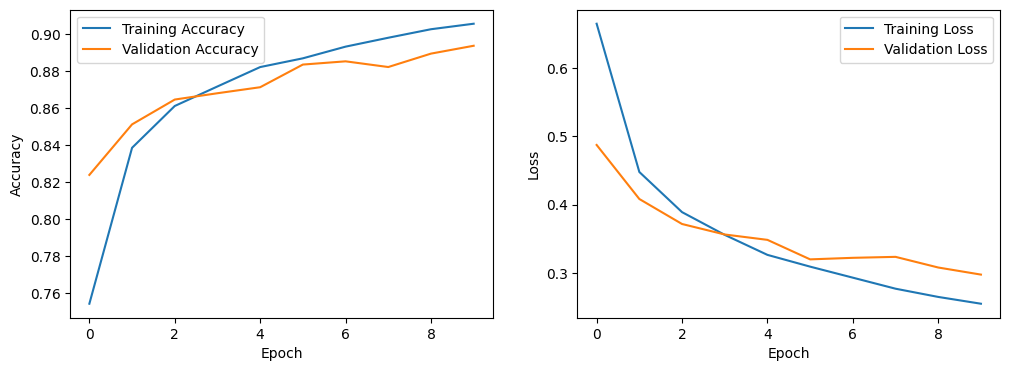

In [12]:
model = keras.Sequential()

# Convolutional layer 1
model.add(layers.Conv2D(6, (5, 5), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
# Convolutional layer 2
model.add(layers.Conv2D(16, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
# Fully connected 
model.add(layers.Dense(120, activation='relu'))
model.add(layers.Dense(84, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

313/313 [==============================] - 3s 11ms/step


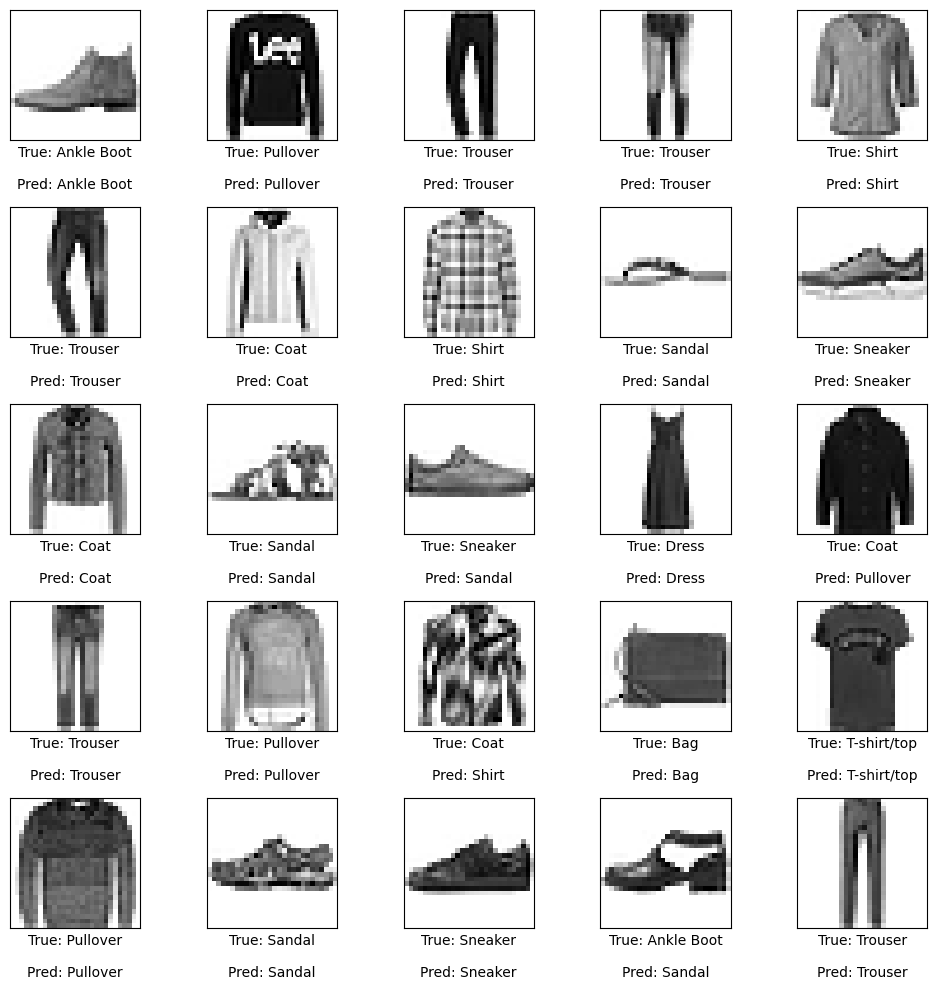

In [23]:
predictions = model.predict(X_test)

predicted_classes = np.argmax(predictions, axis=1)

num_images_to_display = 25

num_columns = 5
num_rows = num_images_to_display // num_columns

plt.figure(figsize=(2*num_columns, 2*num_rows))
for i in range(num_images_to_display):
    plt.subplot(num_rows, num_columns, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_test[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.xlabel(f"True: {labels[y_test[i]]}\n\nPred: {labels[predicted_classes[i]]}")
plt.tight_layout()
plt.show()



313/313 [==============================] - 1s 3ms/step


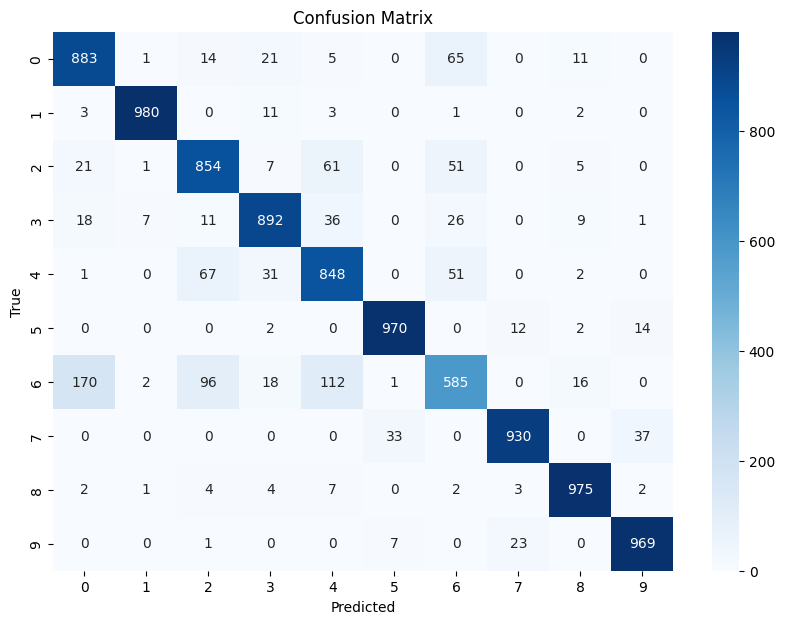

In [15]:
#Confusion matrix 
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

Epoch 1/10
750/750 [==============================] - 89s 118ms/step - loss: 0.4779 - accuracy: 0.8252 - val_loss: 0.3724 - val_accuracy: 0.8609
Epoch 2/10
750/750 [==============================] - 83s 111ms/step - loss: 0.3139 - accuracy: 0.8854 - val_loss: 0.2761 - val_accuracy: 0.8955
Epoch 3/10
750/750 [==============================] - 85s 114ms/step - loss: 0.2657 - accuracy: 0.9009 - val_loss: 0.2564 - val_accuracy: 0.9035
Epoch 4/10
750/750 [==============================] - 86s 114ms/step - loss: 0.2339 - accuracy: 0.9142 - val_loss: 0.2444 - val_accuracy: 0.9063
Epoch 5/10
750/750 [==============================] - 84s 112ms/step - loss: 0.2069 - accuracy: 0.9227 - val_loss: 0.2404 - val_accuracy: 0.9112
Epoch 6/10
750/750 [==============================] - 88s 118ms/step - loss: 0.1842 - accuracy: 0.9319 - val_loss: 0.2365 - val_accuracy: 0.9121
Epoch 7/10
750/750 [==============================] - 86s 114ms/step - loss: 0.1670 - accuracy: 0.9378 - val_loss: 0.2498 - val_ac

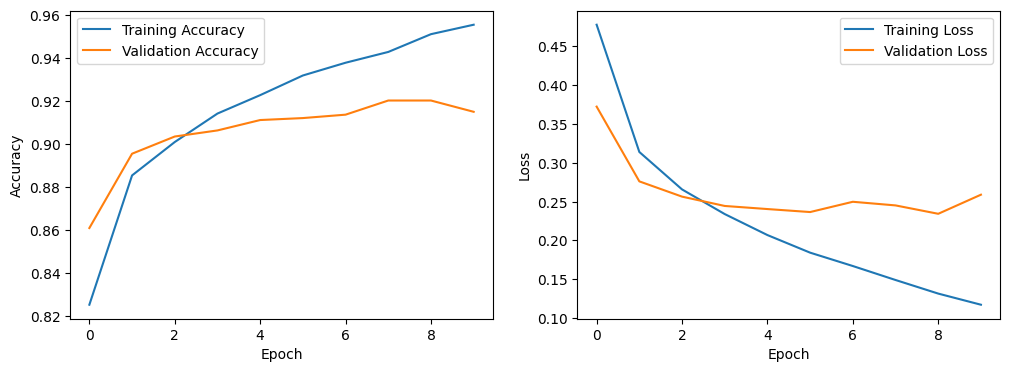

In [16]:
model = keras.Sequential()

model.add(layers.Conv2D(96, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_val, y_val))

test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

ModuleNotFoundError: No module named 'NLTK'

313/313 [==============================] - 3s 10ms/step


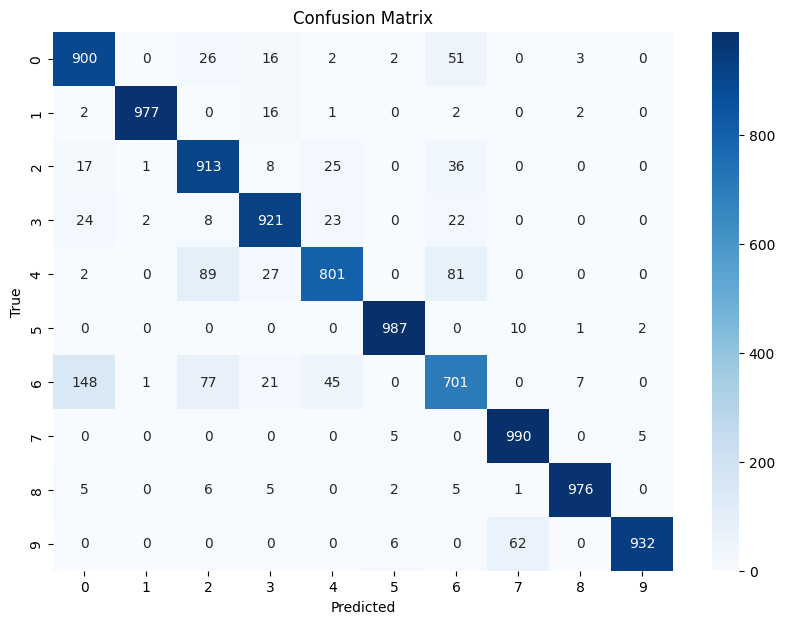

In [17]:
y_pred_prob = model.predict(X_test)

y_pred = np.argmax(y_pred_prob, axis=1)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
